# 220968280 - Anirudh Swaminathan - DSE A2

## Week 3 - Exercise 2 - diabetes dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df = pd.DataFrame()
df = pd.read_csv("C://Users//s_ani//Documents//textbooks//4thSem//ML_LAB//Week3//datasets//diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

### 1. Linear regression on diabetes dataset

In [8]:
X = train['Glucose']
Y = train['BMI']

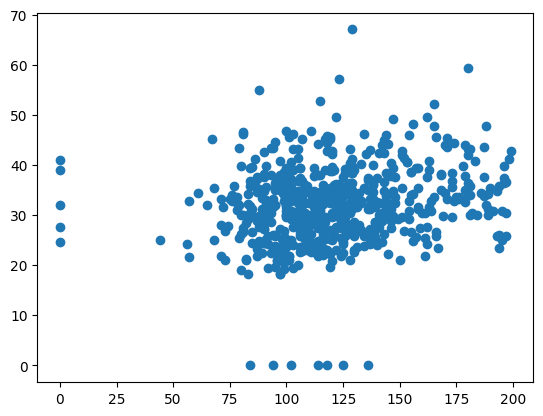

In [9]:
plt.scatter(X, Y)

In [10]:
X = np.array(X).reshape((-1,1))
Y = np.array(Y).reshape((-1,1))
reg = LinearRegression().fit(X, Y)

In [11]:
print(f'{reg.intercept_} + {reg.coef_} * x')

[25.99219473] + [[0.04957338]] * x


In [14]:
x = np.linspace(0, 200, 100)
y = reg.intercept_ + reg.coef_*x
y = y.reshape(100,1)

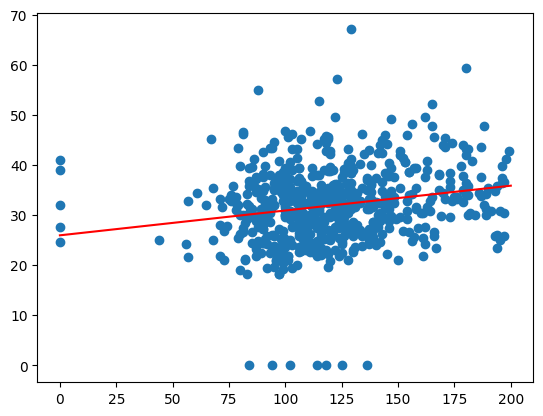

In [15]:
plt.scatter(X, Y)
plt.plot(x, y, c='red')

In [16]:
xi = int(input("Enter an integer: "))
y_pred = reg.predict([[xi]])
print(f'the predicted value is:{y_pred}')

the predicted value is:[[28.96659734]]


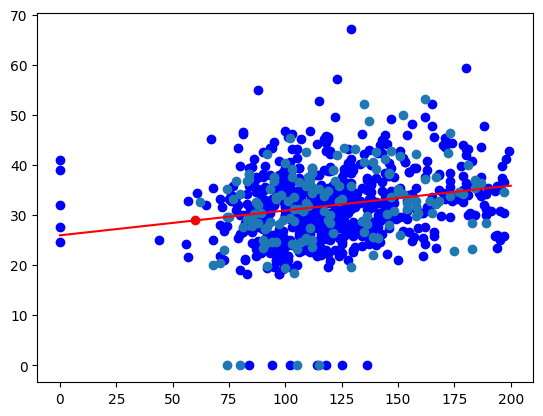

In [18]:
plt.scatter(xi,y_pred,c='red')
plt.plot(x, y, c='red')
plt.scatter(X, Y, c='blue')
plt.scatter(test['Glucose'], test['BMI'])

In [20]:
predictions = reg.predict(np.array(test['Glucose']).reshape((-1,1)))
mse = mean_squared_error(test['BMI'], predictions)
print(f'mse = {mse}')

mse = 66.12024445953733


### 2. Multiple linear regression on diabetes dataset

In [22]:
X = train.drop('BMI', axis=1)
Y = train['BMI']
Y = pd.DataFrame(Y)

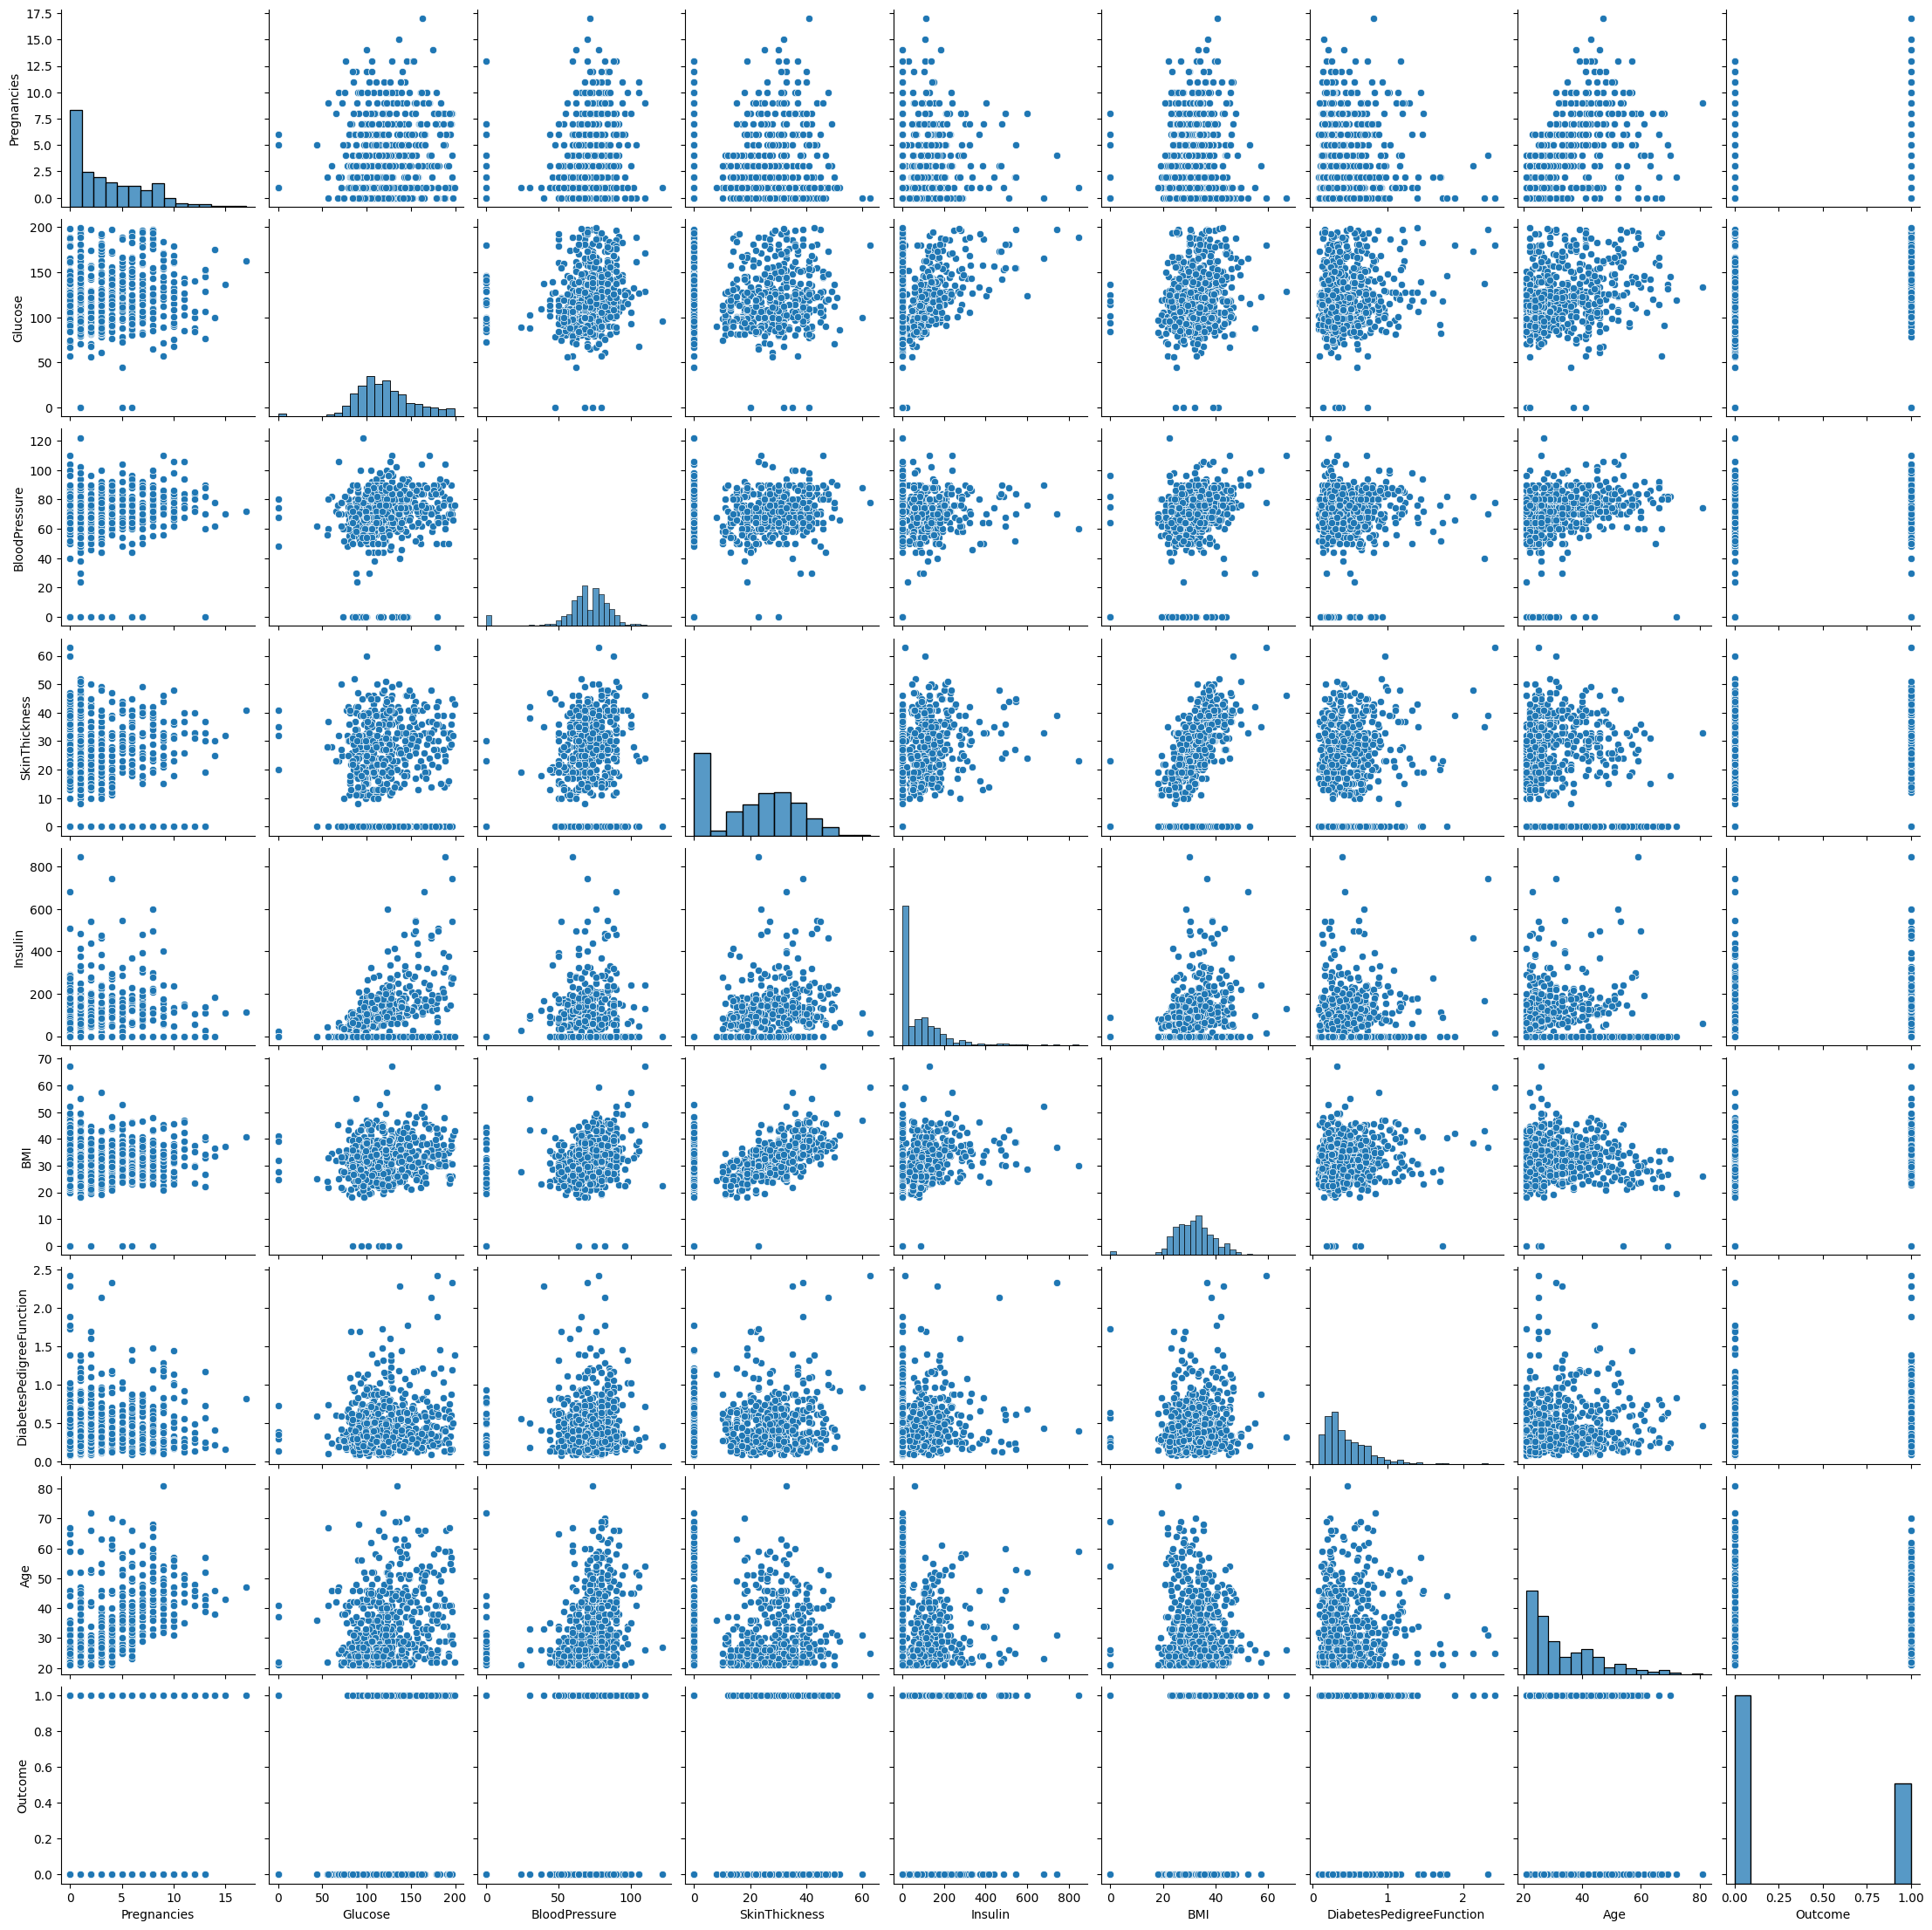

In [23]:
sns.pairplot(train)

In [24]:
reg = LinearRegression().fit(X, Y)

In [25]:
print(f'{reg.intercept_[0]} + {reg.coef_[0][0]}*X1 + {reg.coef_[0][1]}*X2')

21.340908568669505 + 0.009168753094606803*X1 + 0.020096422862700376*X2


In [26]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.304,21,0
618,9,112,82,24,0,1.282,50,1
346,1,139,46,19,83,0.654,22,0
294,0,161,50,0,0,0.254,65,0
231,6,134,80,37,370,0.238,46,1
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,0.411,26,0
106,1,96,122,0,0,0.207,27,0
270,10,101,86,37,0,1.136,38,1
435,0,141,0,0,0,0.205,29,1


In [28]:
x1i = float(input('enter x1:'))
x2i = float(input('enter x2:'))
x3i = float(input('enter x3:'))
x4i = float(input('enter x4:'))
x5i = float(input('enter x5:'))
x6i = float(input('enter x6:'))
x7i = float(input('enter x7:'))
x8i = float(input('enter x8:'))

x = np.array([[x1i, x2i, x3i, x4i, x5i, x6i, x7i, x8i]])
y_pred = reg.predict(x)
print(f'predicted value:{y_pred}')

predicted value:[[35.21886319]]


c:\Users\s_ani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
test_x = test.drop('BMI', axis=1)
test_x = pd.DataFrame(test_x)
predictions = reg.predict((test_x))
mse = mean_squared_error(test['BMI'], predictions)
print(f'mse = {mse}')

mse = 52.46005874215569


### 3. Polynomial regression on diabetes dataset

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [32]:
X = train['Glucose']
X = np.array(X)
Y = train['BMI']
Y = np.array(Y)

In [33]:
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, Y)

LinearRegression()

In [34]:
y_predicted = poly_reg_model.predict(poly_features)

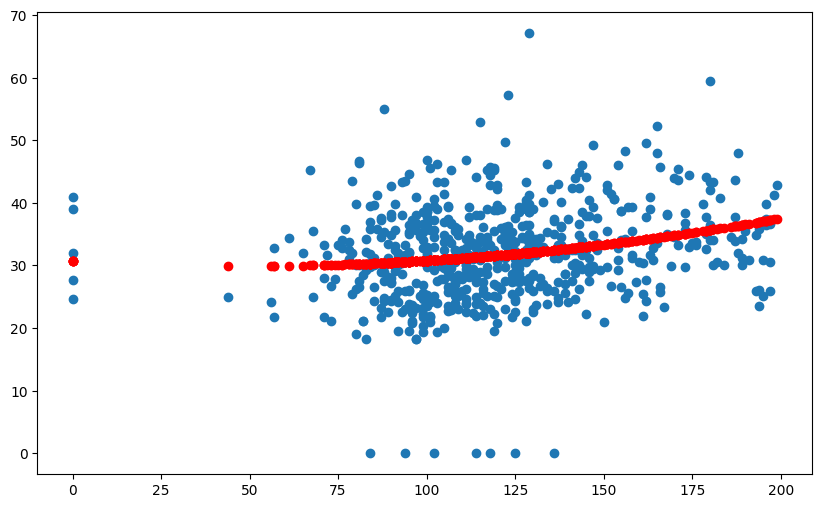

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y)
plt.scatter(X, y_predicted, c="red")
plt.show()

In [37]:
mse = mean_squared_error(test['BMI'], poly_reg_model.predict(poly.fit_transform(np.array(test['Glucose']).reshape(-1, 1))))
print(f'mse = {mse}')

mse = 66.84102182259441


### 4. Logistic regression on diabetes dataset

In [43]:
X = train['BMI']
X = np.array(X)
X = X.reshape((-1,1))
Y = train['Outcome']
Y = np.array(Y)
Y = Y.reshape((-1,1))

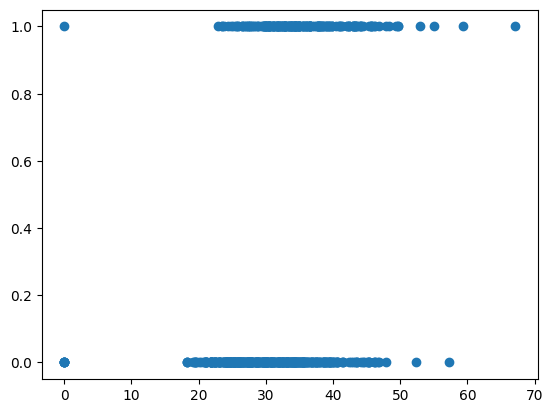

In [44]:
plt.scatter(X,Y)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logisticRegr = LogisticRegression()

In [47]:
logisticRegr.fit(X, Y)

c:\Users\s_ani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [49]:
xi = int(input('enter BMI:'))
y_p = logisticRegr.predict(np.array(xi).reshape((-1,1)))
print(y_p)

[0]


In [51]:
predictions = logisticRegr.predict(np.array(test['BMI']).reshape((-1,1)))

In [54]:
score = logisticRegr.score(np.array(test['BMI']).reshape((-1,1)), np.array(test['Outcome']).reshape((-1,1)))
print(f'accuracy = {score}')

accuracy = 0.6558441558441559


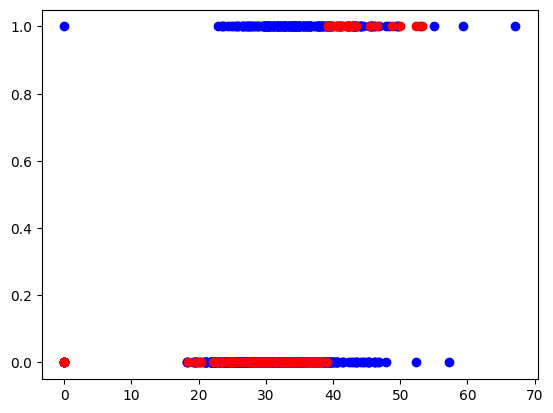

In [55]:
plt.scatter(xi, y_p, c='orange')
plt.scatter(X,Y,c='blue')
plt.scatter(test['BMI'],predictions,c='red')